# Intermediate systems

In [1]:
%matplotlib notebook

In [2]:
# imports
from importlib import reload
import os 
import datetime
import numpy as np
from pkg_resources import resource_filename
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import iris
import iris.quickplot as qplt

from oceanpy.sst import io as sst_io

from mhw_analysis.systems import io as mhwsys_io

In [12]:
mhw_mask_file = os.path.join(os.getenv('MHW'), 'db', 'MHW_mask_vary.hdf')

# Plot defs

In [13]:
def plot_sys(mhw_sys):
    mask = mhwsys_io.load_mask_from_system(mhw_sys, mhw_mask_file=mhw_mask_file)
    #
    idx = mask.data == mhw_sys.mask_Id
    #import pdb; pdb.set_trace()
    any_mask = np.sum(idx, axis=2)
    any_mask[any_mask > 0] = 1
    # Cube
    #import pdb; pdb.set_trace()
    any_cube = iris.cube.Cube(any_mask, var_name='msys', 
                              dim_coords_and_dims=[(mask.coord('latitude'), 0), 
                                                   (mask.coord('longitude'), 1)])
    # Plot
    fig = plt.figure(figsize=(10, 6))
    plt.clf()

    proj = ccrs.PlateCarree(central_longitude=-180.0)
    ax = plt.gca(projection=proj)

    # Pacific events
    # Draw the contour with 25 levels.
    cm = plt.get_cmap('Blues')

    cplt = iris.plot.contourf(any_cube, cmap=cm)  # , vmin=0, vmax=20)#, 5)
    #cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
    #cb.set_label('Blob')

    # Add coastlines to the map created by contourf.
    plt.gca().coastlines()
    plt.show()

# Load up the systems

In [4]:
mhw_systems = mhwsys_io.load_systems(vary=True)

Loading systems from /home/xavier/Projects/Oceanography/MHW/db/MHW_systems_vary.hdf


In [5]:
mhw_systems.head()

,NSpax,category,mask_Id,max_area,xcen,xboxmin,xboxmax,ycen,yboxmin,yboxmax,zcen,zboxmin,zboxmax,date,lat,lon
Id,,,,,,,,,,,,,,,,
1,10,2,1,2,46.000000,46,46,663.500000,663,664,371.000000,369,373,1983-01-07,-78.375000,166.000000
2,1792,1,2,137,48.621651,46,53,666.896790,651,683,484.181915,464,499,1983-04-30,-77.719587,166.849197
3,23,1,3,4,46.000000,46,46,664.434753,663,666,571.391296,569,574,1983-07-26,-78.375000,166.233688
4,603213,4,4,8660,103.669983,46,210,761.788330,587,896,721.075378,476,806,1983-12-23,-63.957504,190.572083
5,59,1,6,5,46.135593,46,47,664.135620,663,666,638.118652,630,644,1983-10-01,-78.341102,166.158905


# Grab Intermediate

## maxarea around 1000

In [6]:
sys_1000 = (mhw_systems.max_area > 700) & (mhw_systems.max_area < 3000) & (np.abs(mhw_systems.lat) < 65.)

In [7]:
mhw_systems[['max_area', 'lat', 'mask_Id']][sys_1000]

,max_area,lat,mask_Id
Id,,,
4768,2530,-53.202267,24434
6943,1700,-64.859303,35546
8828,2046,-63.060734,46816
9588,2424,-63.941696,50773
9918,2375,-63.805643,52012
...,...,...,...
600423,721,61.978317,2036721
601018,758,63.503372,2038619
602662,771,64.456955,2044137


## Pacific

In [27]:
pacific = (mhw_systems.lon > 200) & (mhw_systems.lon < 250) & (mhw_systems.lat < 45.) & (mhw_systems.lat > -45.)

In [20]:
mhw_systems[['max_area', 'lat', 'mask_Id']][sys_1000 & pacific]

,max_area,lat,mask_Id
Id,,,
71262,2673,-44.622013,287013
135238,935,-43.842064,487806
148782,1268,-39.611122,533440
150525,771,-43.290787,539179
157868,1304,-37.258175,564031
...,...,...,...
514316,871,35.450851,1743811
520446,913,36.036865,1764785
521286,1282,39.546539,1767741


### Northern

In [17]:
idx = 521286
mhw_systems.loc[idx]

NSpax            28348
category             1
mask_Id        1767741
max_area          1282
xcen           517.686
xboxmin            489
xboxmax            540
ycen           880.589
yboxmin            827
yboxmax            922
zcen           3892.16
zboxmin           3863
zboxmax           3917
date        1992-08-28
lat            39.5465
lon            220.272
Name: 521286, dtype: object

### Plots

Loading mask from


<IPython.core.display.Javascript object>


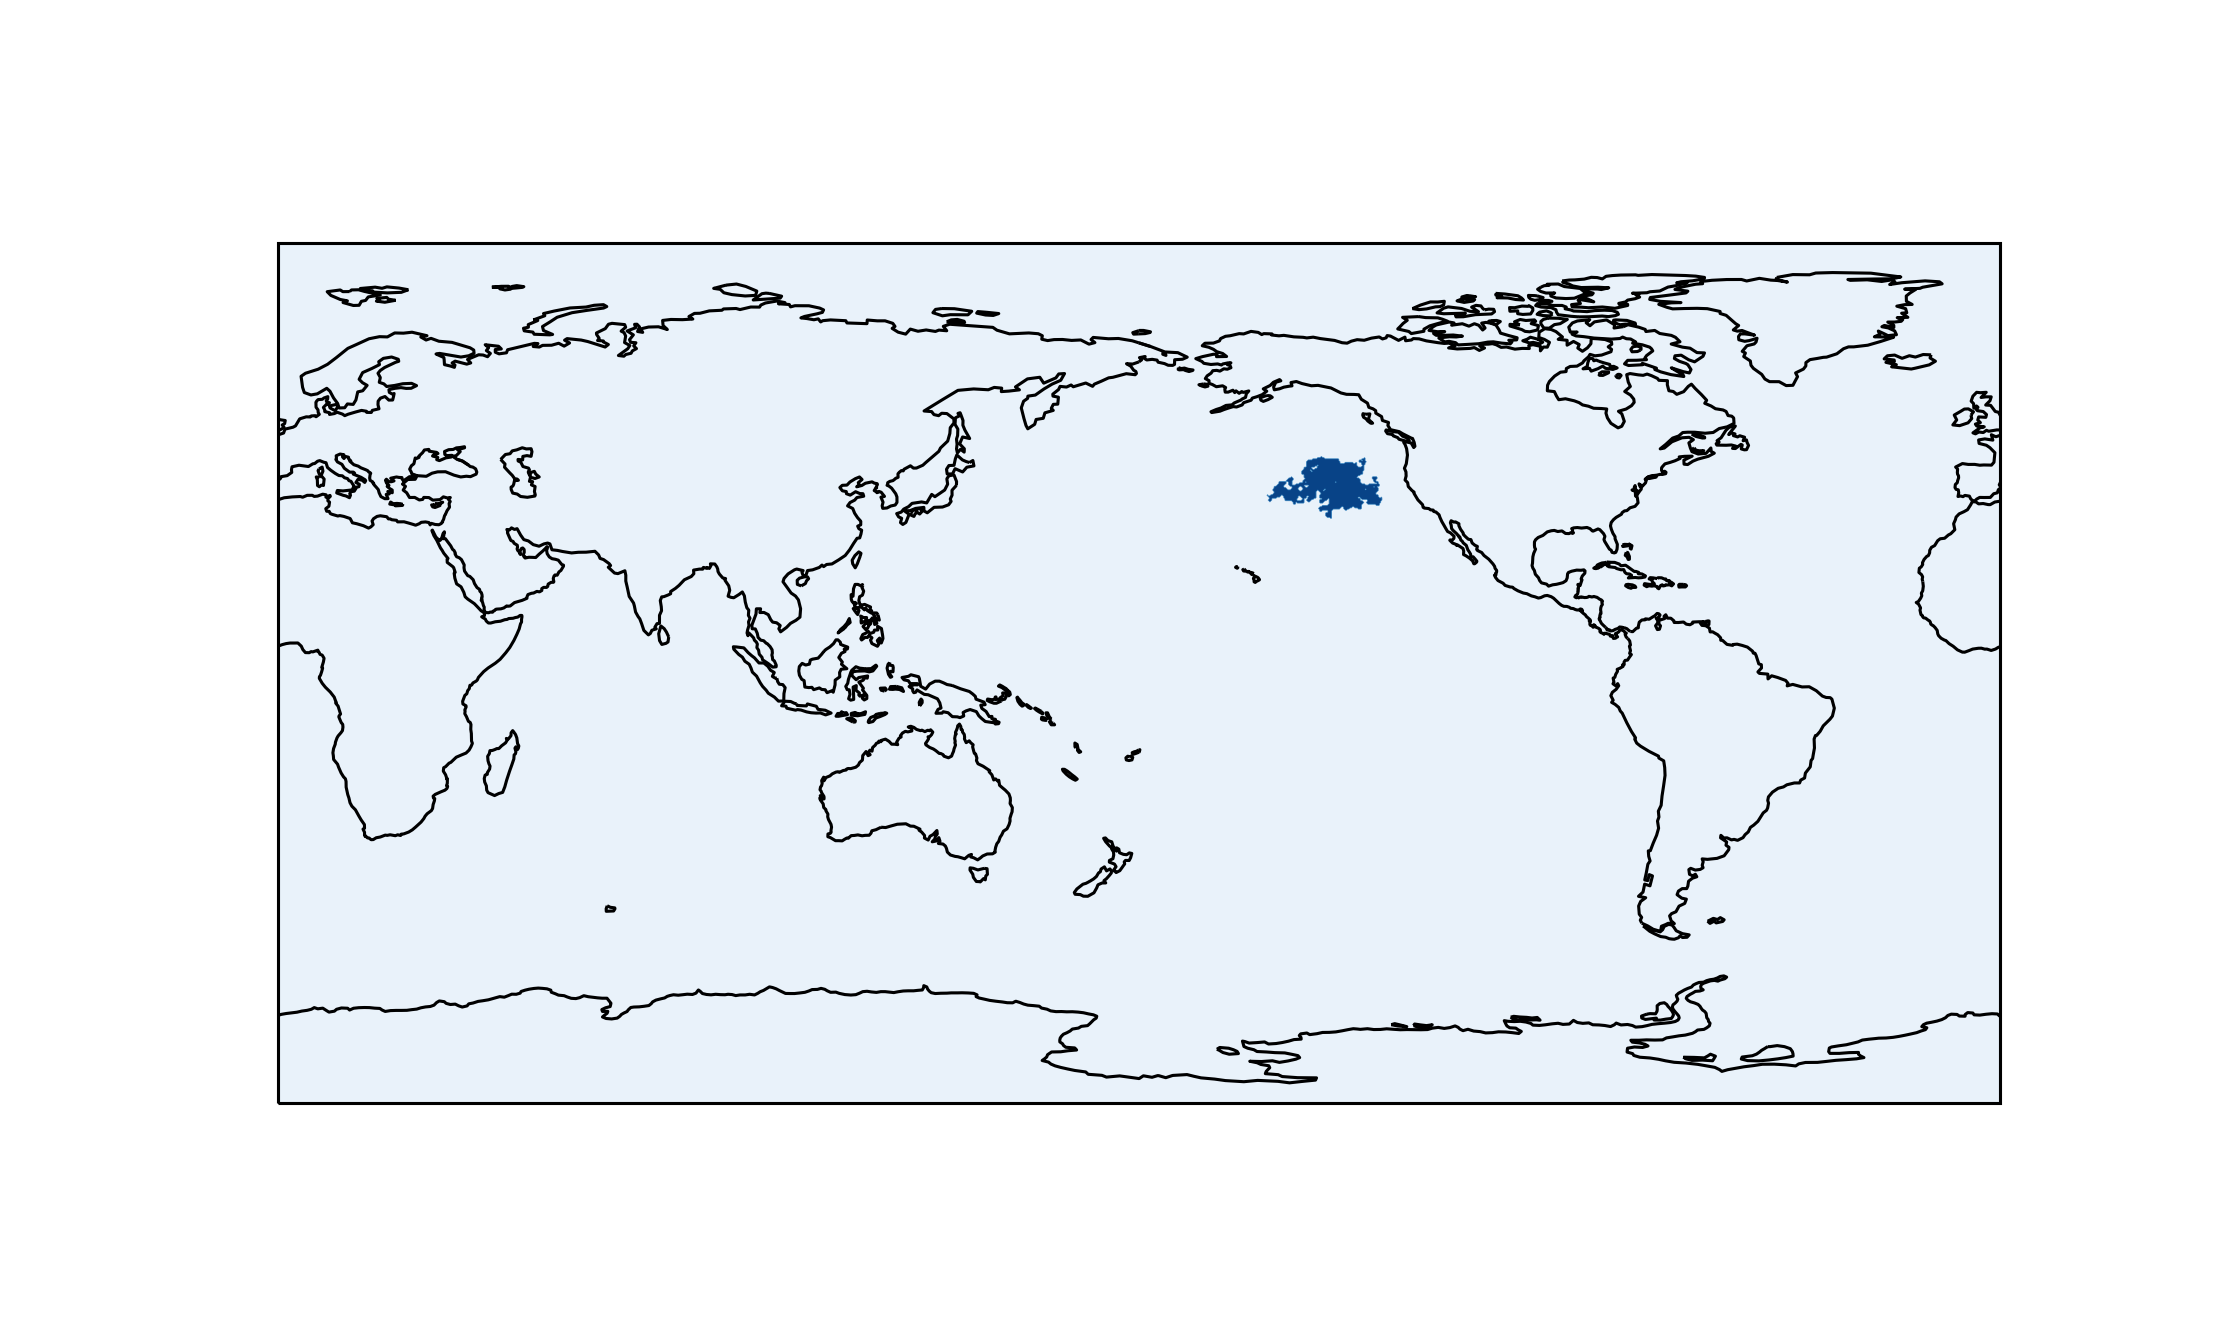

In [18]:
plot_sys(mhw_systems.loc[idx])

### Southern

In [22]:
idxPS = 148782
mhw_systems.loc[idxPS]

NSpax            29310
category             2
mask_Id         533440
max_area          1268
xcen           201.056
xboxmin            169
xboxmax            240
ycen           980.725
yboxmin            933
yboxmax           1029
zcen           9686.06
zboxmin           9607
zboxmax           9770
date        2008-07-09
lat           -39.6111
lon            245.306
Name: 148782, dtype: object

Loading mask from


<IPython.core.display.Javascript object>


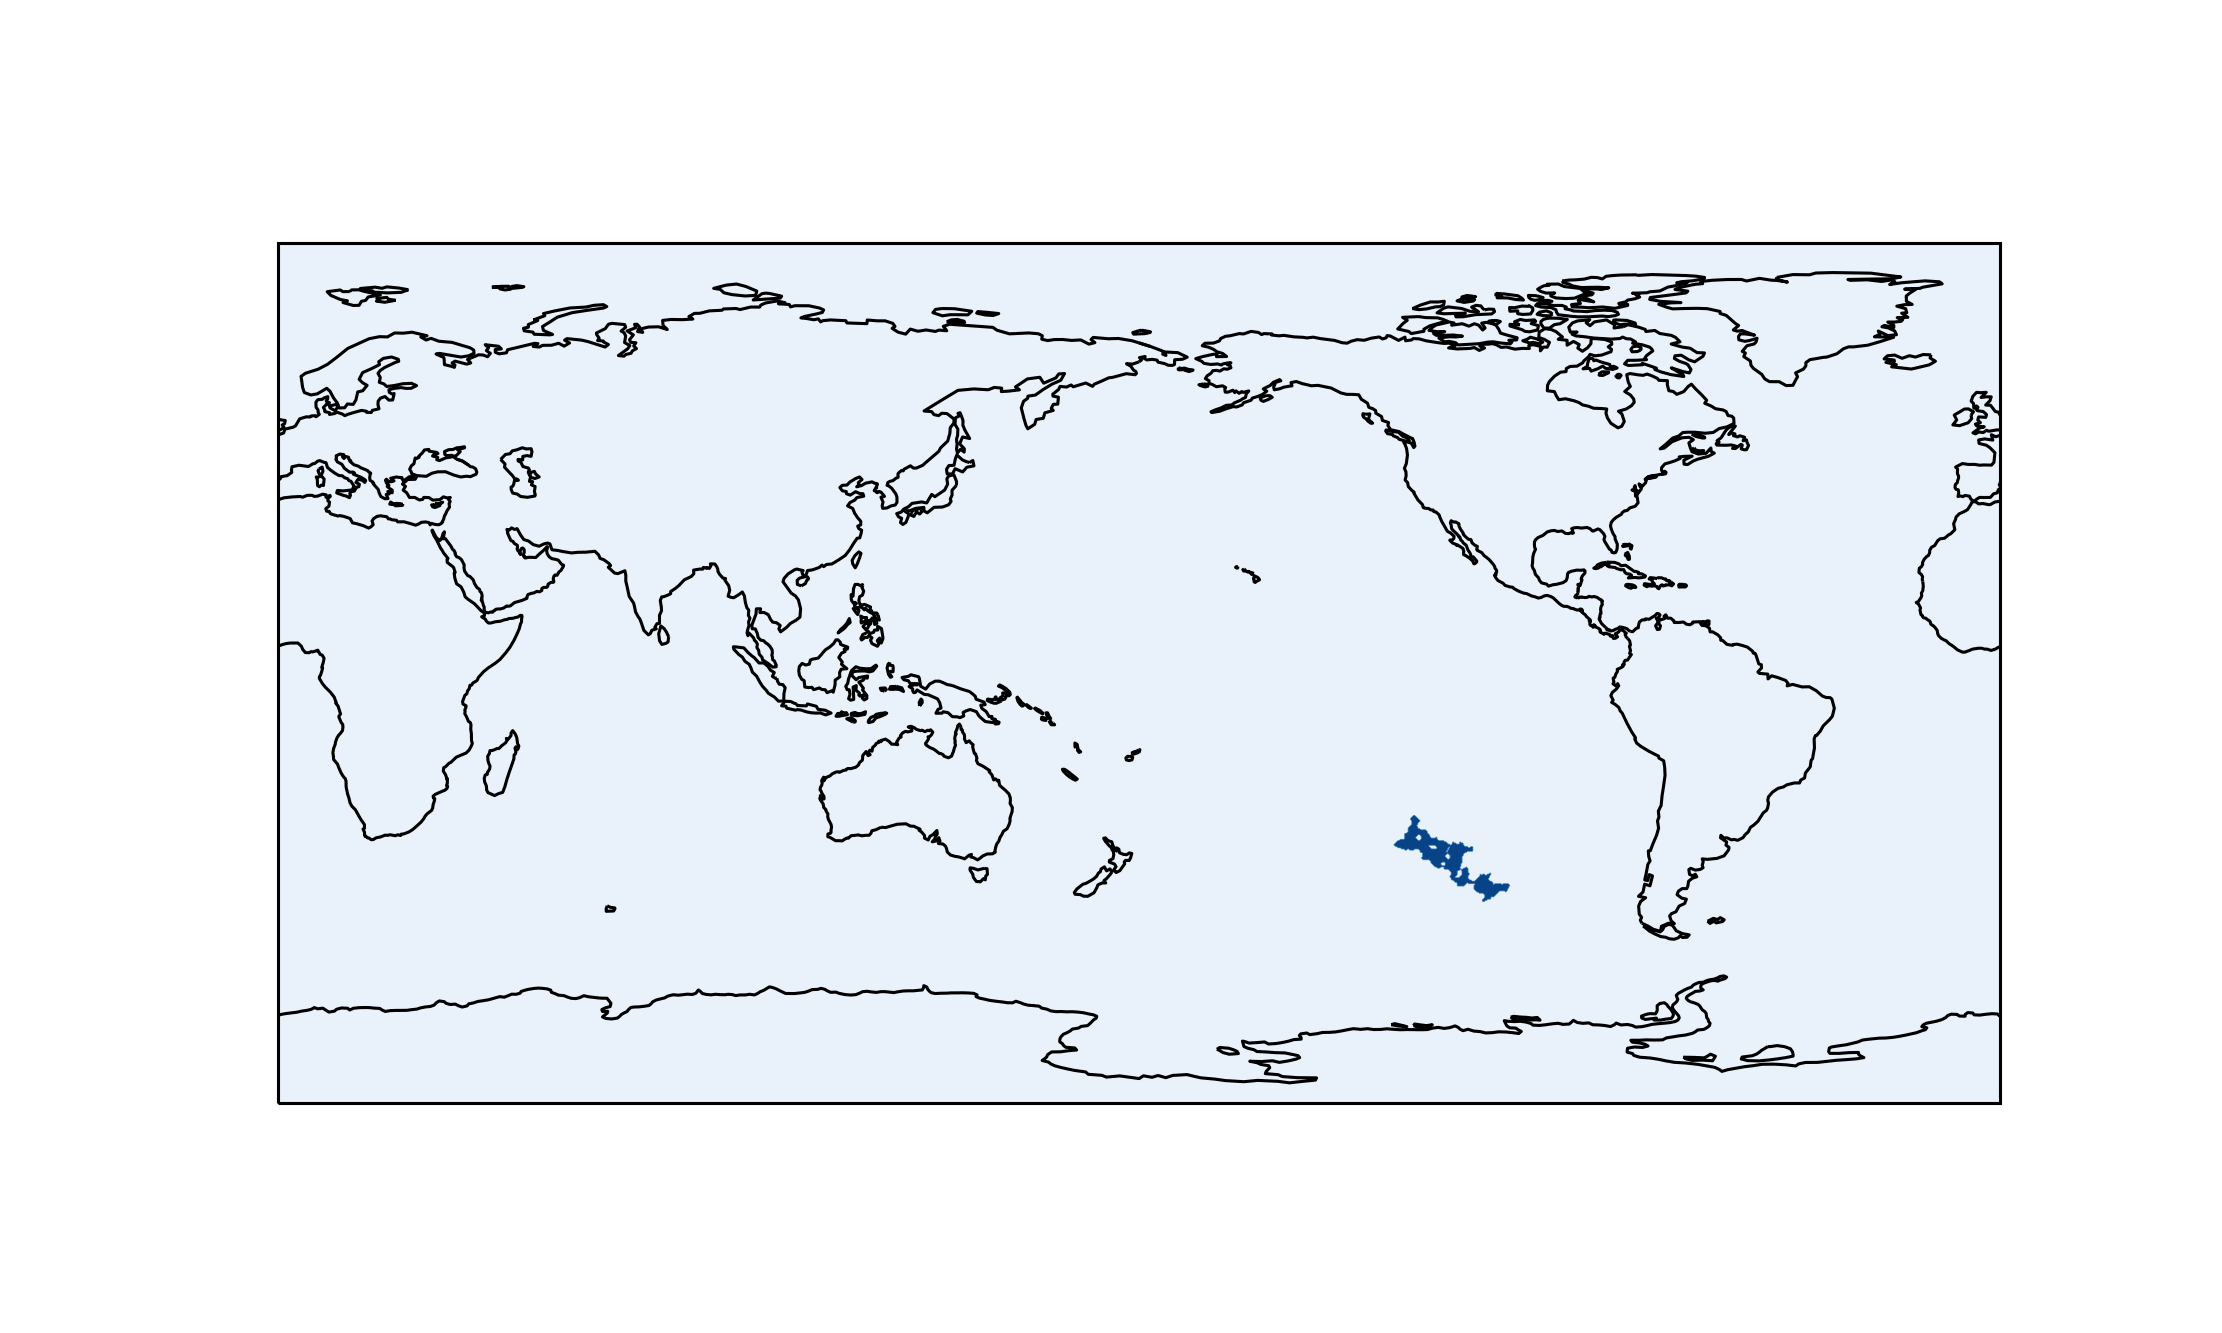

In [24]:
plot_sys(mhw_systems.loc[idxPS])

## Indian

In [31]:
indian = (mhw_systems.lon > 60.) & (mhw_systems.lon < 80.) & (mhw_systems.lat > -25.) & (mhw_systems.lat < -10)

In [32]:
mhw_systems[['max_area', 'lat', 'mask_Id']][sys_1000 & indian]

,max_area,lat,mask_Id
Id,,,
233267,1084,-23.662697,851390
246909,2752,-19.708565,909617
251017,1083,-24.323105,926816
256514,1660,-21.183914,951083
264618,793,-11.911049,985530
266414,1466,-19.382286,993170
267225,941,-18.350700,996617
272407,1341,-11.147034,1017591
278440,2691,-11.696831,1041656


In [33]:
idxI = 246909
mhw_systems.loc[idxI]

NSpax            83208
category             2
mask_Id         909617
max_area          2752
xcen           280.666
xboxmin            237
xboxmax            372
ycen           260.447
yboxmin            187
yboxmax            329
zcen           4645.74
zboxmin           4602
zboxmax           4682
date        1994-09-20
lat           -19.7086
lon            65.2367
Name: 246909, dtype: object

Loading mask from


<IPython.core.display.Javascript object>


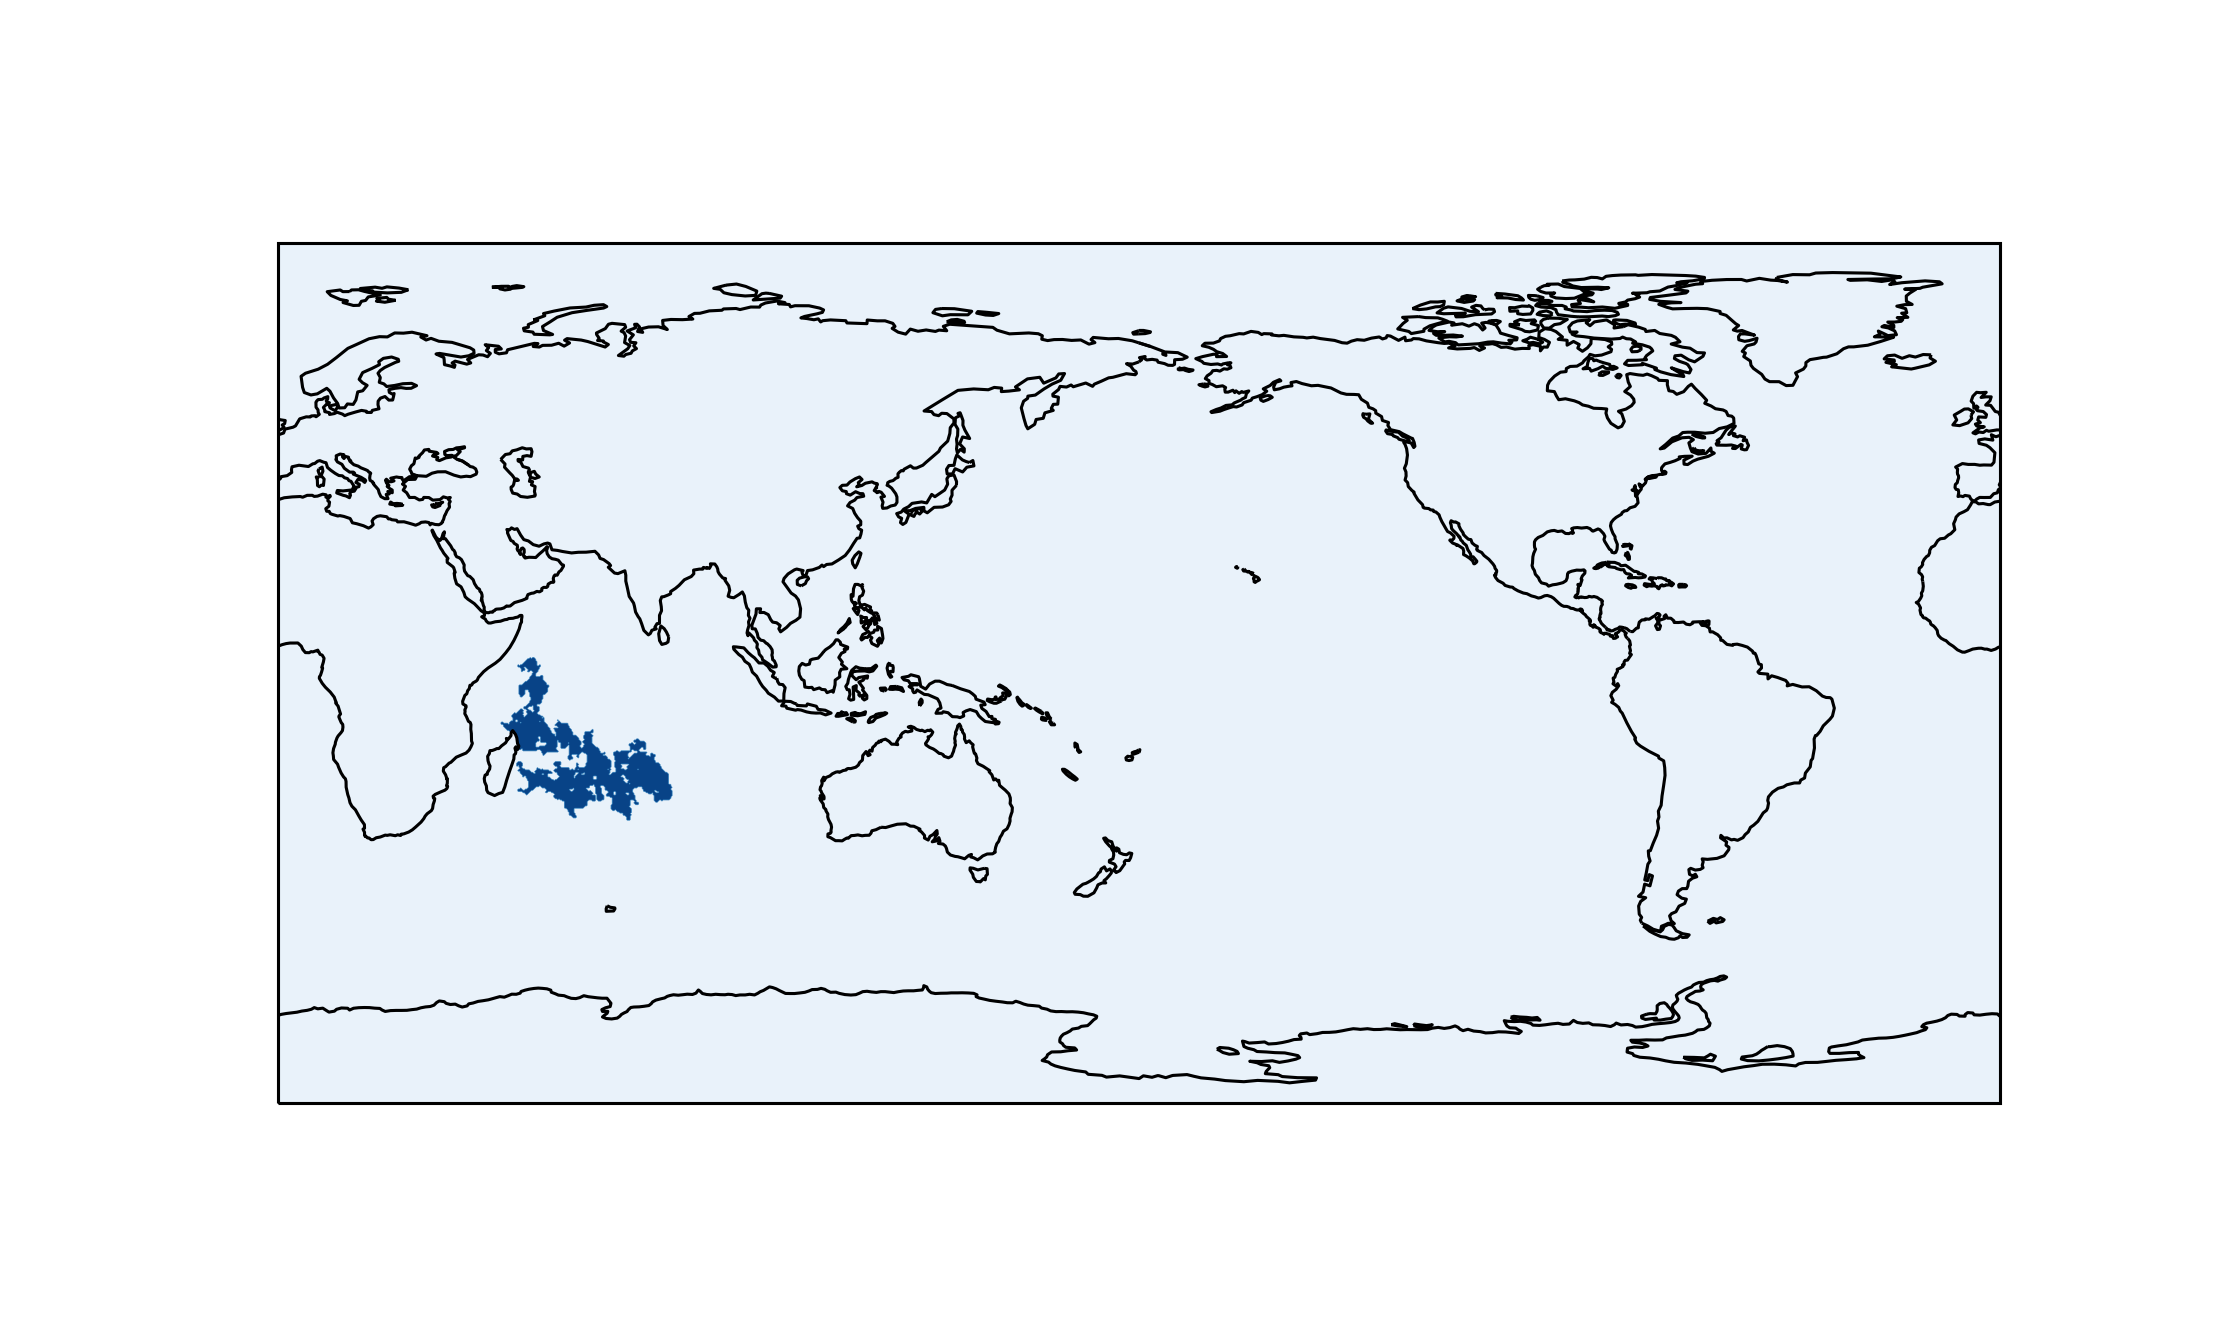

In [35]:
plot_sys(mhw_systems.loc[idxI])

## Atlantic

In [38]:
atlantic = (mhw_systems.lon > 310.) & (mhw_systems.lat > -35.) & (mhw_systems.lat < 35.)

In [44]:
mhw_systems[['max_area', 'lon', 'lat', 'mask_Id']][sys_1000 & atlantic]

,max_area,lon,lat,mask_Id
Id,,,,
180534,2987,324.762695,-30.503540,644519
182330,925,350.390656,-34.719498,651442
183965,1786,327.943390,-26.906868,657548
184028,1568,356.165833,-33.338833,657763
185574,1712,325.775177,-29.840748,663474
...,...,...,...,...
501843,1596,344.861084,33.113419,1702092
505088,1264,339.200409,32.138481,1712996
509127,1024,318.650604,33.744705,1726208


In [40]:
idxAS = 180534
mhw_systems.loc[idxAS]

NSpax           155335
category             3
mask_Id         644519
max_area          2987
xcen           237.486
xboxmin            187
xboxmax            298
ycen           1298.55
yboxmin           1232
yboxmax           1375
zcen           12550.8
zboxmin          12451
zboxmax          12710
date        2016-05-12
lat           -30.5035
lon            324.763
Name: 180534, dtype: object

Loading mask from


<IPython.core.display.Javascript object>


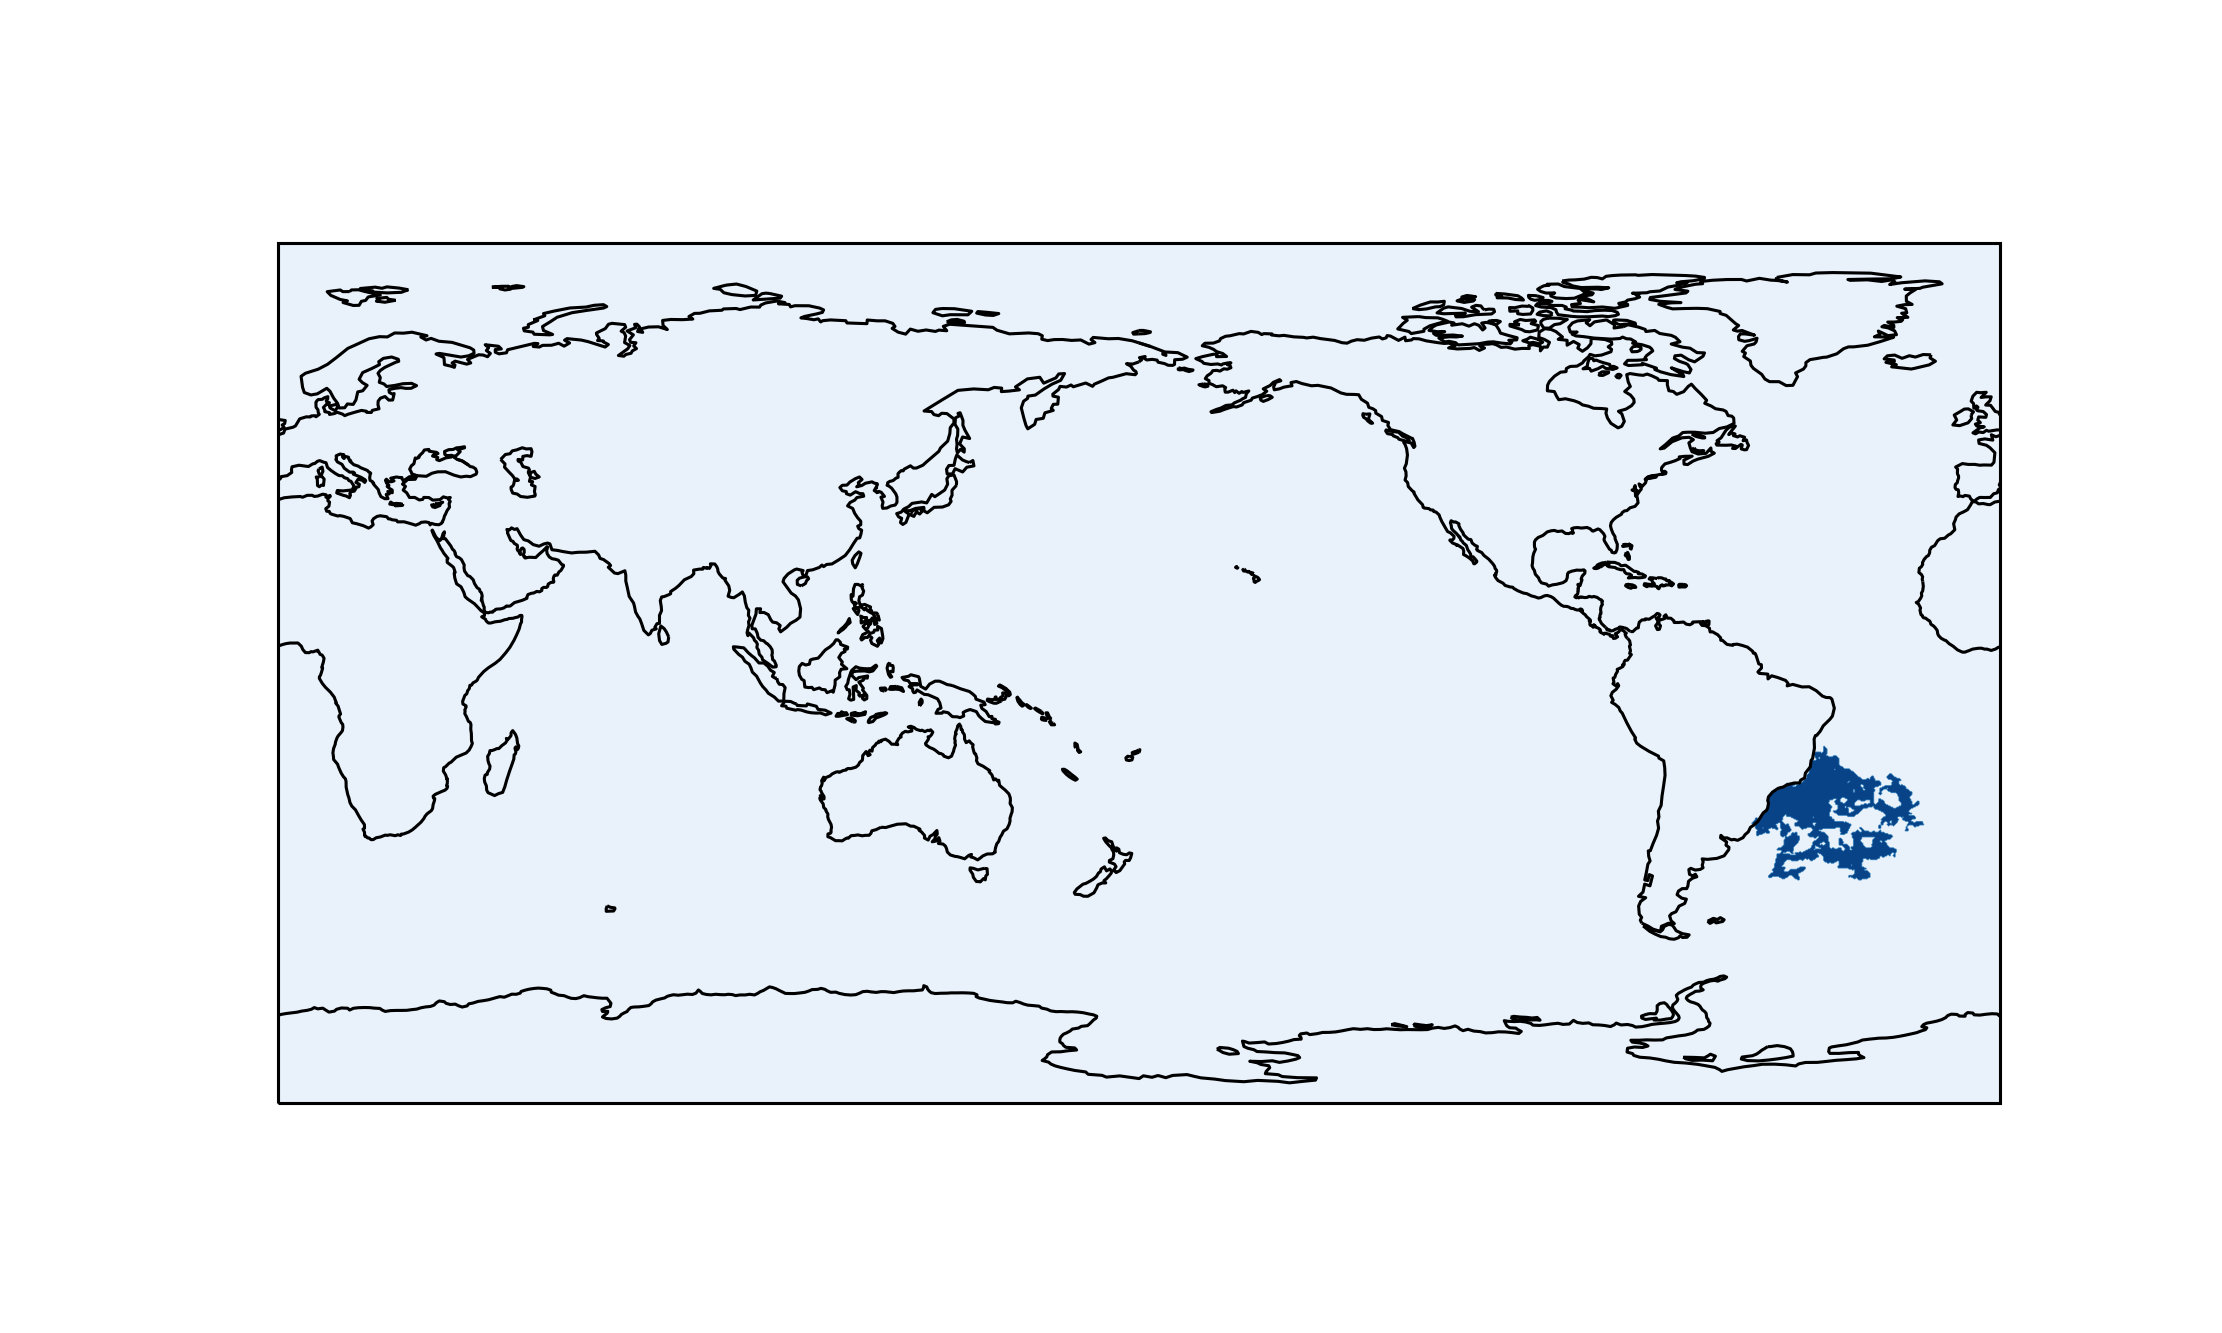

In [41]:
plot_sys(mhw_systems.loc[idxAS])

In [45]:
idxAN = 509127
mhw_systems.loc[idxAN]

NSpax            30103
category             1
mask_Id        1726208
max_area          1024
xcen           494.479
xboxmin            473
xboxmax            521
ycen            1274.1
yboxmin           1238
yboxmax           1311
zcen           13006.4
zboxmin          12965
zboxmax          13038
date        2017-08-11
lat            33.7447
lon            318.651
Name: 509127, dtype: object

Loading mask from


<IPython.core.display.Javascript object>


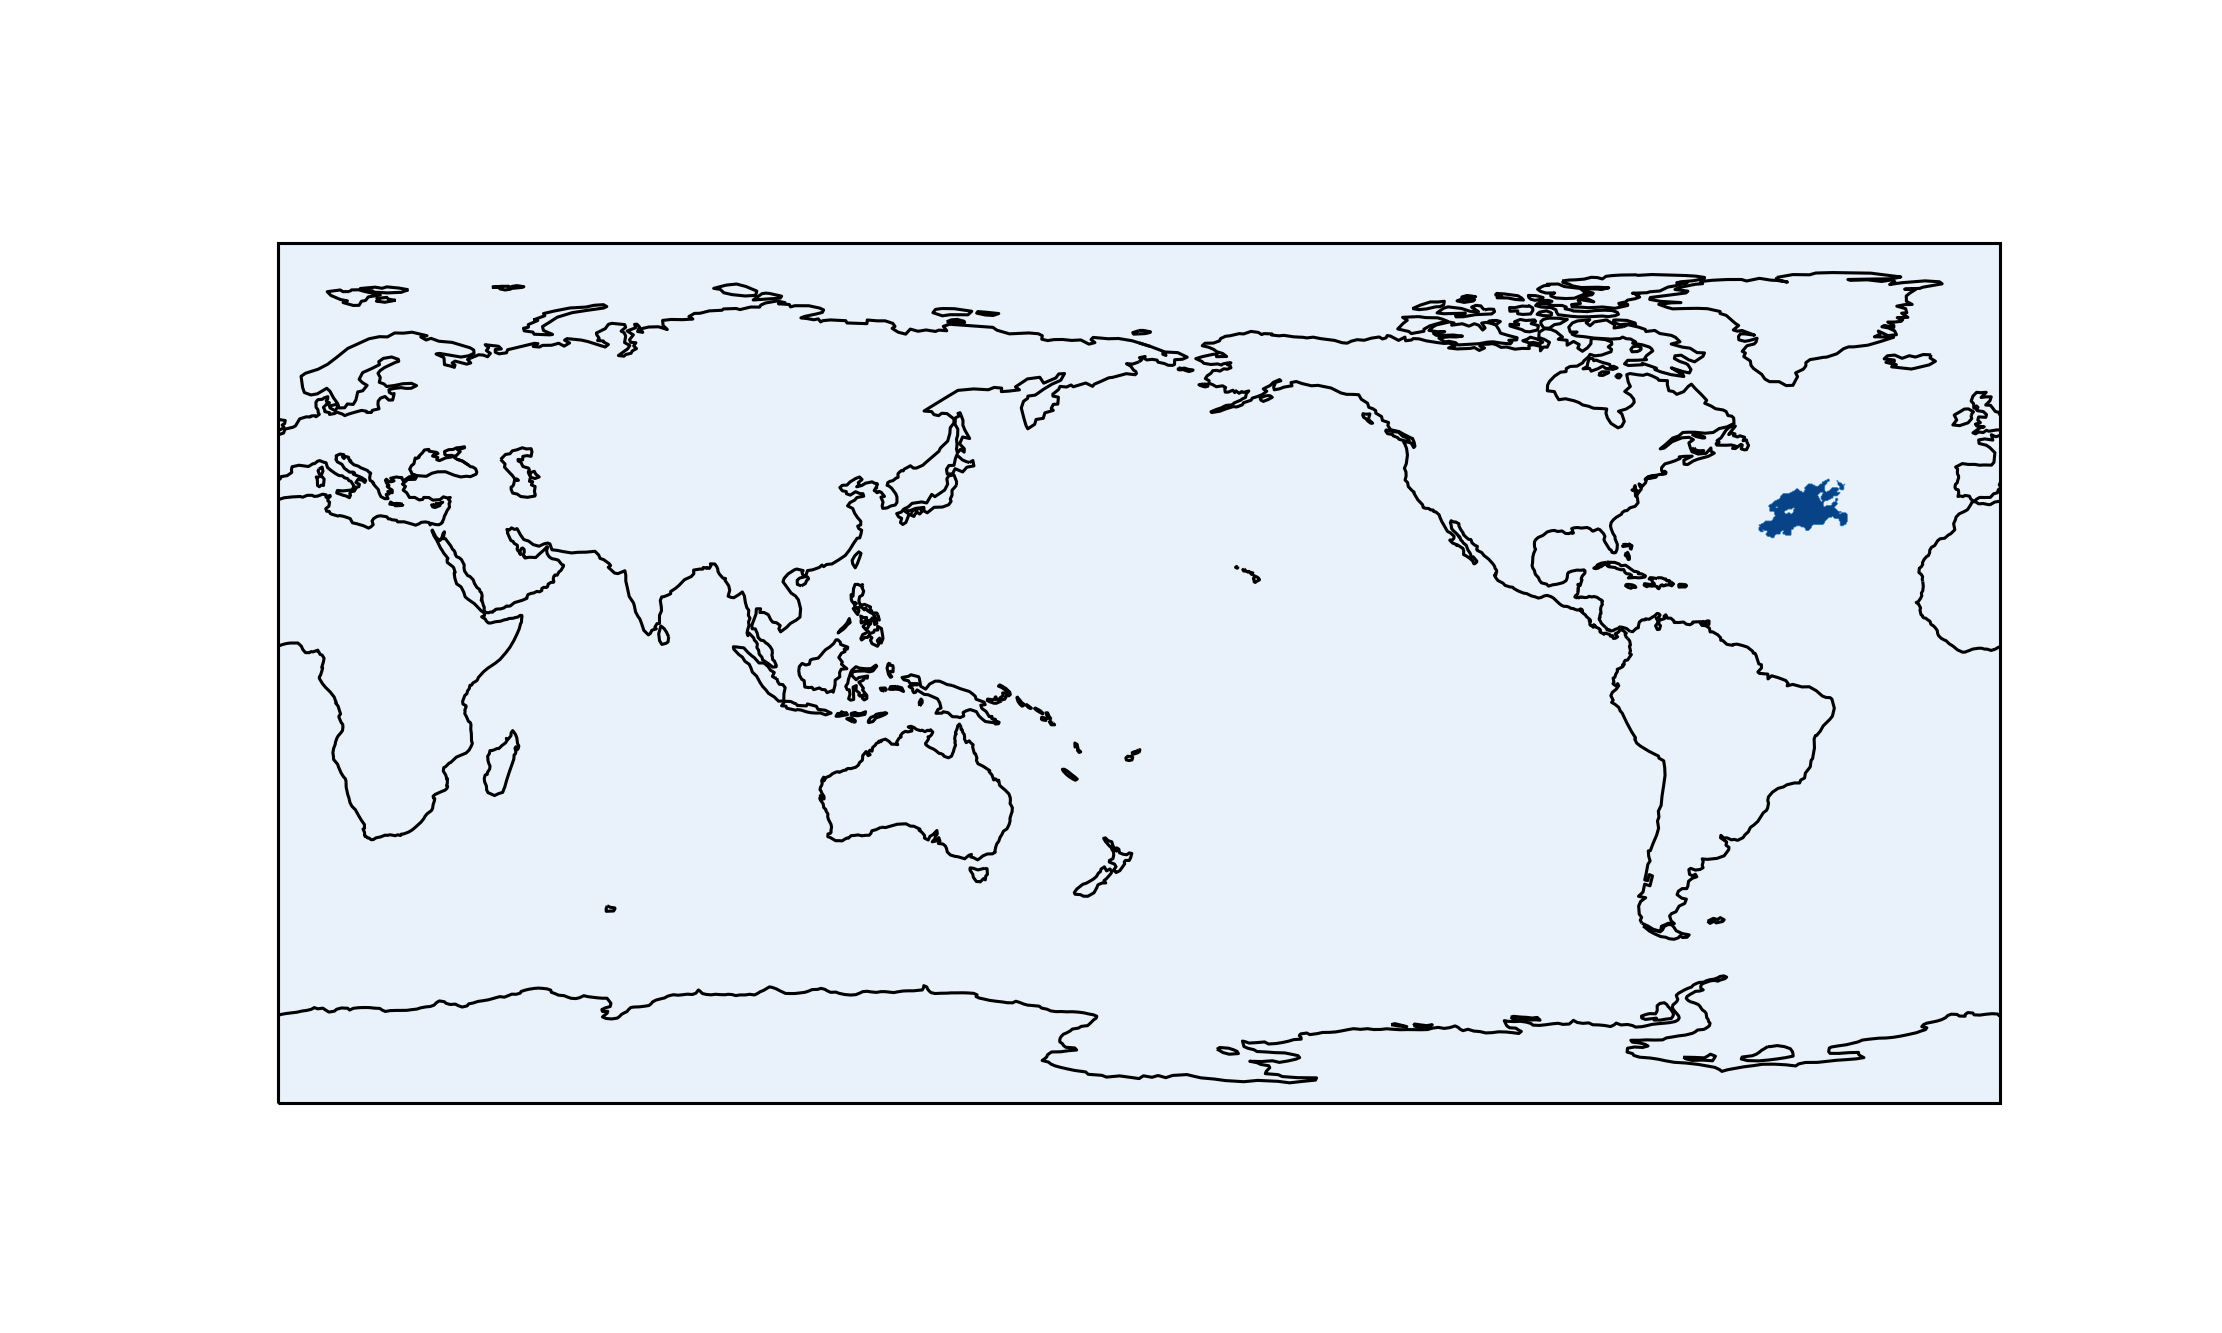

In [46]:
plot_sys(mhw_systems.loc[idxAN])